**Introducción a Qiskit y kickback phase**

**Introducción a Qiskit**

Es un marco de desarrollo de software (SDK) de IBM de código abierto para trabajar con computadoras cuánticas a nivel de circuitos, pulsos y algoritmos. Qiskit se compone de elementos que trabajan juntos para permitir la computación cuántica. **Qiskit Terra** proporciona herramientas para crear circuitos cuánticos en o cerca del nivel del código de máquina cuántica. **Aer** proporciona simuladores de computación cuántica de alto rendimiento con modelos de ruido realistas. **Ignis** proporciona herramientas para la verificación de hardware cuántico, caracterización de ruido y corrección de errores. **Aqua** proporciona una biblioteca de algoritmos de dominio cruzado sobre los cuales se pueden construir aplicaciones específicas de dominio.

**Qiskit Terra**

[Qiskit Terra](https://https://qiskit.org/documentation/stable/0.24/the_elements.html) proporciona la base para componer programas cuánticos a nivel de circuitos y pulsos, optimizarlos y gestionar la ejecución de lotes de experimentos en dispositivos de acceso remoto. Los módulos principales son:

* **qiskit.circuit** Implementar circuitos cuánticos. Un circuito cuántico generalmente comienza con los qubits en el estado |0,…,0> y estas puertas evolucionan los qubits a estados que no se pueden representar de manera eficiente en una computadora clásica. Para extraer información sobre el estado de un circuito cuántico debemos realizar una medición.
*   **qiskit.pulse** Un programa de pulsos es un conjunto de pulsos que se envían a un experimento cuántico que se aplica a un canal (línea de entrada experimental). Este es un nivel más bajo que los circuitos y requiere que cada puerta del circuito se represente como un conjunto de pulsos.
*   **qiskit.transpiler** El transpiler introduce el concepto de un administrador de pases para permitir a los usuarios explorar la optimización y encontrar mejores circuitos cuánticos para su algoritmo dado.
*   **qiskit.providers** Una vez que el usuario ha hecho que los circuitos se ejecuten en el backend, necesita tener una forma conveniente de trabajar con él. Terra tiene proveedor, backend, trabajo y resultado, los resultados se obtendrán de los backends remotos usando result = job.result()
*   **qiskit.quantum_info** Algoritmos y análisis del circuito y **qiskit.visualization** para visualizar el circuito.

**Qiskit Aer**

[Qiskit Aer](https://https://qiskit.org/documentation/stable/0.24/the_elements.html). Simuladores, emuladores y depuradores. Los tres backends del simulador de alto rendimiento:
*   **QasmSimulator** Permite la ejecución ideal y con ruido de múltiples disparos de circuitos qiskit y devuelve conteos o memoria. Existen múltiples métodos que se pueden usar para simular diferentes circuitos de manera más eficiente. Incluye *statevector, stabilizer, extended_stabilizer* and *matrix_product_state*
*   **StatevectorSimulator** Permite la ejecución ideal de un solo disparo de circuitos qiskit y devuelve el vector de estado final del simulador después de la aplicación.
*   **UnitarySimulator** Permite la ejecución ideal de un solo disparo de circuitos qiskit y devuelve la matriz unitaria final del propio circuito. El circuito no puede contener operaciones de medida o reinicio para este backend.

In [ ]:
!pip install qiskit

In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

**Estados in Qiskit**

Después de instalar Qiskit e importar los paquetes correspondientes, creamos un circuito cuántico de dos qubits, inicializamos el circuito con un estado superposición de todas las bases y realizamos una simulación.

In [3]:
qc = QuantumCircuit(2)  # Create a quantum circuit with two qubit
initial_state = [1/2,1/2,1/2,1/2]   # Define initial_state
qc.initialize(initial_state, qc.qubits) # Apply initialisation operation to the qubits
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

Luego vemos el resultado de nuestra simulación, el vector de estado (que tiene 1/2 en todas las componentes) y un histograma del resultado de las medidas, que muestra la probabilidad de obtener cada una de las bases.

In [4]:
#We see the statevector
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


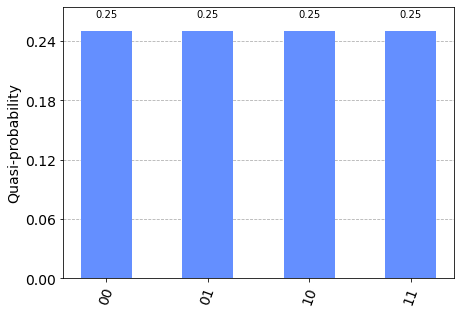

In [5]:
#We measure our qubits and see the result
qc.measure_all()
qc.draw()
counts = result.get_counts()
plot_histogram(counts)

**Traslado de fase (kickback phase)**

El kickback phase es un mecanismo básico en los algoritmos cuánticos, en el que el valor propio agregado por una puerta o transformación a un qubit se traslada a un qubit diferente a través de una operación controlada (controlled gate).

A continuación partimos de dos qubits |00⟩, negamos el qubit 1 (el qubit 0, q_0, es el de más a la derecha y el de más arriba en el circuito), para tener **|10⟩** y aplicamos una puerta Hadamard a cada qubit para tener **|-+⟩.**

Aplicamos una control not (CNOT) a **|-+⟩.** y debido a que el qubit de control está en superposición introduce una fase en el qubit objetivo, que se traslada al qubit de control resultando en **|--⟩.**

Después, aplicamos otra vez las puertas Hadamard al resultado, **|--⟩**, para obtener **|11⟩.**

┌───┐          ┌───┐
q_0: ┤ H ├───────■──┤ H ├
     ├───┤┌───┐┌─┴─┐├───┤
q_1: ┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘

Statevector([-7.85046229e-17+3.08148791e-32j,
              1.11022302e-16+6.12323400e-17j,
              1.57009246e-16+6.12323400e-17j,
              1.00000000e+00-2.44929360e-16j],
            dims=(2, 2))


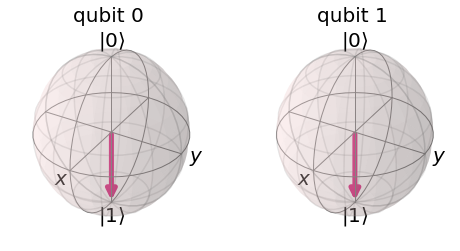

In [6]:
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit import Aer, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw())

qobj = assemble(qc)
svsim = Aer.get_backend('statevector_simulator')
final_state = svsim.run(qobj).result().get_statevector()
print(final_state)
plot_bloch_multivector(final_state)

Por lo tanto, partiendo de los qubits **|10⟩**, aplicando puertas Hadamard y una puerta CNOT, llegamos a **|11⟩**, donde el efecto se ha trasladado al qubit control en lugar de al qubit objetivo.